# <center> MARKOWITZ </center>

## Libraries


In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pypfopt.cla import CLA
from pypfopt import risk_models, expected_returns, plotting

from tqdm import tqdm

In [3]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [66]:
from datetime import datetime, timedelta

In [4]:
# Define stocks and fetch data
stocks = ["BBVA", "NVDA", "AMZN", "BABA", "^IRX"]
data = yf.download(stocks, start="2022-01-01", end="2024-08-31")['Adj Close']
val_data = yf.download(stocks, start="2024-09-01", end="2024-11-25")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed


In [7]:
data

Ticker,AMZN,BABA,BBVA,NVDA,^IRX
Date,,,,,
2022-01-03,170.404495,116.256577,4.823013,30.070986,0.053
2022-01-04,167.522003,115.464661,4.920284,29.241371,0.080
2022-01-05,164.356995,117.009865,4.839225,27.558167,0.085
2022-01-06,163.253998,122.292496,5.033767,28.131214,0.090
2022-01-07,162.554001,125.363571,5.155355,27.201761,0.088
...,...,...,...,...,...
2024-08-26,175.500000,81.760002,10.205999,126.440468,4.998
2024-08-27,173.119995,81.449997,10.293231,128.280197,4.968
2024-08-28,170.800003,79.620003,10.235077,125.590607,4.955


In [5]:
mean_returns

Ticker
AMZN    0.000377
BABA    0.000076
BBVA    0.001364
NVDA    0.002693
^IRX    0.007767
dtype: float64

In [6]:
cov_matrix

Ticker,AMZN,BABA,BBVA,NVDA,^IRX
Ticker,,,,,
AMZN,0.000615,0.000248,0.000195,0.000500,-0.000014
BABA,0.000248,0.001196,0.000201,0.000376,0.000055
BBVA,0.000195,0.000201,0.000446,0.000281,0.000113
NVDA,0.000500,0.000376,0.000281,0.001276,-0.000076
^IRX,-0.000014,0.000055,0.000113,-0.000076,0.002149


In [28]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

In [29]:
mu

Ticker
AMZN    0.017664
BABA   -0.118010
BBVA    0.332490
NVDA    0.682091
^IRX    4.544885
dtype: float64

In [30]:
S

Ticker,AMZN,BABA,BBVA,NVDA,^IRX
Ticker,,,,,
AMZN,0.154980,0.062421,0.049238,0.126121,-0.003511
BABA,0.062421,0.301515,0.050526,0.094723,0.013817
BBVA,0.049238,0.050526,0.112386,0.070892,0.028400
NVDA,0.126121,0.094723,0.070892,0.321551,-0.019248
^IRX,-0.003511,0.013817,0.028400,-0.019248,0.541503


In [31]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
#print("These are the raw weights: ", raw_weights)
cleaned_weights = ef.clean_weights()
print("These are the cleaned weights: ", cleaned_weights)
ef_performance = ef.portfolio_performance(verbose=True)


These are the cleaned weights:  OrderedDict([('AMZN', 0.0), ('BABA', 0.0), ('BBVA', 0.0), ('NVDA', 0.23653), ('^IRX', 0.76347)])
Expected annual return: 363.1%
Annual volatility: 57.2%
Sharpe Ratio: 6.35


In [33]:
# Display results
print("Optimal Portfolio Weights:")
for stock, weight in cleaned_weights.items():
    print(f"{stock}: {weight:.4%}")
print("\nPortfolio performance:")
print("Expected annual return:", ef_performance[0])
print("Annual volatility:", ef_performance[1])
print("Sharpe ratio:", ef_performance[2])

Optimal Portfolio Weights:
AMZN: 0.0000%
BABA: 0.0000%
BBVA: 0.0000%
NVDA: 23.6530%
^IRX: 76.3470%

Portfolio performance:
Expected annual return: 3.631205878760077
Annual volatility: 0.5715506503597778
Sharpe ratio: 6.353252990744246


In [34]:
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Use CLA to compute the optimal portfolio
cla = CLA(mu, S)
cla.max_sharpe()  # Maximize the Sharpe Ratio
cla_weights = cla.clean_weights()
print("These are the cleaned weights: ", cla_weights)
cla_performance = cla.portfolio_performance(verbose=True)


These are the cleaned weights:  OrderedDict([('AMZN', 0.0), ('BABA', 0.0), ('BBVA', 0.0), ('NVDA', 0.23653), ('^IRX', 0.76347)])
Expected annual return: 363.1%
Annual volatility: 57.2%
Sharpe Ratio: 6.35


Optimal Portfolio Weights:
AMZN: 0.0000%
BABA: 0.0000%
BBVA: 0.0000%
NVDA: 23.6530%
^IRX: 76.3470%

Portfolio performance:
Expected annual return: 3.6312058578592965
Annual volatility: 0.5715506470700016
Sharpe ratio: 6.353252990744246


Text(55.847222222222214, 0.5, 'Expected Return')

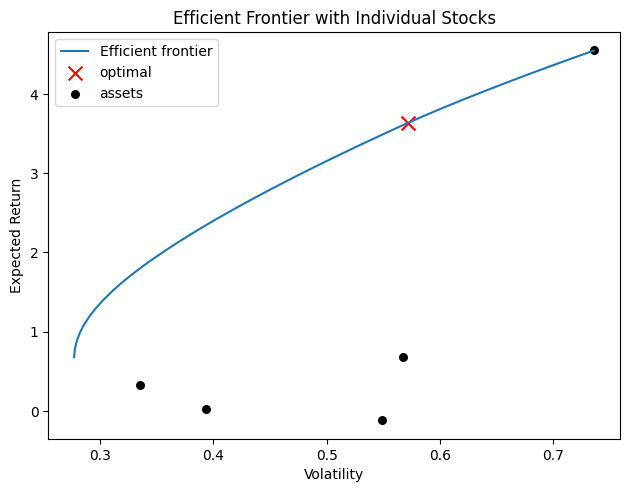

In [35]:
# Display results
print("Optimal Portfolio Weights:")
for stock, weight in cla_weights.items():
    print(f"{stock}: {weight:.4%}")
print("\nPortfolio performance:")
print("Expected annual return:", cla_performance[0])
print("Annual volatility:", cla_performance[1])
print("Sharpe ratio:", cla_performance[2])

# Plot the efficient frontier
ax = plotting.plot_efficient_frontier(cla, show_assets=True)
plt.title("Efficient Frontier with Individual Stocks")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")

In [54]:
dates = pd.date_range(start="2024-09-01", end="2024-11-25")

In [50]:
def get_data(tickets, start, end):
    dates = pd.DataFrame(pd.date_range(start=start, end=end), columns=["date"])
    dates.date = dates.date.astype(str)
    data = yf.download(tickets, start, end)["Close"]
    data.reset_index(inplace=True, drop=False)
    data = data[["Date"] + tickets]
    data.rename(columns={'Date': 'date'}, inplace=True)
    data.date = data.date.astype(str)
    data = dates.merge(data, on="date", how="left")
    data = data.interpolate()
    return data

In [92]:
data = get_data(stocks, "2023-12-01", "2024-11-25")

[*********************100%%**********************]  5 of 5 completed


In [94]:
data = data[data.date>="2024-01-01"]

In [95]:
data

,date,BBVA,NVDA,AMZN,BABA,^IRX
31,2024-01-01,9.1775,48.506499,150.432495,75.447502,5.20475
32,2024-01-02,9.2000,48.167999,149.929993,74.760002,5.21300
33,2024-01-03,9.0500,47.569000,148.470001,76.589996,5.23500
34,2024-01-04,9.1800,47.998001,144.570007,74.660004,5.22800
35,2024-01-05,9.2900,49.097000,145.240005,73.010002,5.22000
...,...,...,...,...,...,...
356,2024-11-21,9.6900,146.669998,198.380005,85.580002,4.41300
357,2024-11-22,9.5400,141.949997,197.119995,83.129997,4.41500
358,2024-11-23,9.5400,141.949997,197.119995,83.129997,4.41500
359,2024-11-24,9.5400,141.949997,197.119995,83.129997,4.41500


In [98]:
start_date.strftime("%Y-%m-%d")

'2023-09-02'

In [106]:
stocks = ["BBVA", "NVDA", "AMZN", "BABA", "^IRX"]

risk_free_rate = 0.05
budget = 1

results = {"date": [], "pv": []}
for end_date in tqdm(dates):
    start_date = end_date.date() - timedelta(days=365)  
    data2 = data[(data.date>=start_date.strftime("%Y-%m-%d")) & (data.date<=end_date.strftime("%Y-%m-%d"))]
    
    mu = expected_returns.mean_historical_return(data2[stocks][:-1])
    S = risk_models.sample_cov(data2[stocks][:-1])

    ef = EfficientFrontier(mu, S)
    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()

    returns = dict(((data2[stocks].iloc[-1]-data2[stocks].iloc[-2]) / data2[stocks].iloc[-2]))
    day_returns = 0
    for stock, weight in cleaned_weights.items():
        day_returns += weight * returns[stock]
    budget = budget * (1 + day_returns)
    
    results["date"].append(end_date.strftime("%Y-%m-%d"))
    results["pv"].append(budget)



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86/86 [00:01<00:00, 73.71it/s]


In [108]:
pd.DataFrame(results)

,date,pv
0,2024-09-01,0.975859
1,2024-09-02,0.951736
2,2024-09-03,0.927633
3,2024-09-04,0.912533
4,2024-09-05,0.920865
...,...,...
81,2024-11-21,1.178881
82,2024-11-22,1.140943
83,2024-11-23,1.140943
84,2024-11-24,1.140943


In [109]:
df_mark = pd.DataFrame(results)

In [110]:
df_mark.to_csv("data/_markovitz_portfolio_value.csv", index=False)